In [1]:
# ASHISH KUMAR SINHA MDS201904
# downloading training and validation data and storing it in tmp folder 
 !wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-01-17 08:17:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   238MB/s    in 0.6s    

2020-01-17 08:17:51 (238 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-01-17 08:17:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applicati

In [0]:
# importing os library to gain access to the file system 
# and zipfile library to unzip the downloaded data
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

#the files are unzipped and are stored in tmp directory with each training and validation set in diffrent folder

We see in the side panel of the google colab that subdiretories of training and validation set is created with each containing folders of named horses and humans which inturn contain the images

In [0]:
# now we store the paths to our data in diffrent variables
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])
#Now we can label the images manually using some regex techniques but we will use ImageGenerator library of tensorflow

['horse36-7.png', 'horse40-4.png', 'horse17-8.png', 'horse19-3.png', 'horse44-7.png', 'horse39-2.png', 'horse47-9.png', 'horse36-2.png', 'horse17-7.png', 'horse08-2.png']
['human01-15.png', 'human12-16.png', 'human02-18.png', 'human07-12.png', 'human11-14.png', 'human13-09.png', 'human14-27.png', 'human17-24.png', 'human02-08.png', 'human02-26.png']
['horse5-259.png', 'horse5-458.png', 'horse3-011.png', 'horse6-218.png', 'horse2-224.png', 'horse1-264.png', 'horse1-568.png', 'horse6-403.png', 'horse2-183.png', 'horse6-345.png']
['valhuman03-22.png', 'valhuman04-20.png', 'valhuman02-04.png', 'valhuman01-04.png', 'valhuman01-20.png', 'valhuman05-26.png', 'valhuman02-21.png', 'valhuman05-04.png', 'valhuman04-07.png', 'valhuman05-07.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))
num_train = len(os.listdir(train_horse_dir))+len(os.listdir(train_human_dir)) # number of training examples
num_val = len(os.listdir(validation_horse_dir))+len(os.listdir(validation_human_dir)) # number of validation examples

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

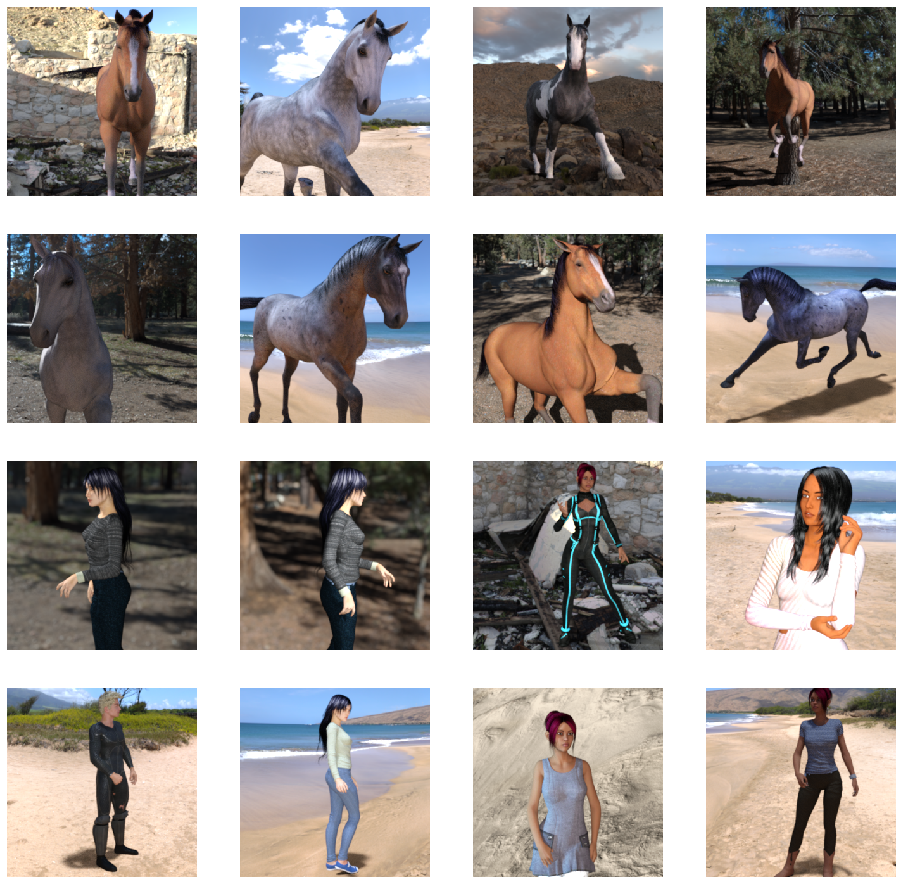

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 16
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
# downloading and installing tensorflow v 2.0.0
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 3.8MB 34.8MB/s 
     |████████████████████████████████| 450kB 55.7MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [38]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# building cnn model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(160, 160, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
#callback function to cancel the triaining when training accuracy of atleast 99.5% is reached
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Setting up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 160*160 and their labels (binary).

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = 160
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to 160x160
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to 160x160
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [47]:
callbacks = myCallback()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=(num_train)//BATCH_SIZE,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks = [callbacks])

Epoch 1/10
32/32 [==============================] - 34s 1s/step - loss: 0.5581 - acc: 0.7236 - val_loss: 1.4289 - val_acc: 0.6016
Epoch 2/10
32/32 [==============================] - 35s 1s/step - loss: 0.1702 - acc: 0.9337 - val_loss: 0.9688 - val_acc: 0.8477
Epoch 3/10
32/32 [==============================] - 36s 1s/step - loss: 0.1843 - acc: 0.9365 - val_loss: 1.0218 - val_acc: 0.8320
Epoch 4/10
32/32 [==============================] - 35s 1s/step - loss: 0.1052 - acc: 0.9628 - val_loss: 0.2732 - val_acc: 0.9141
Epoch 5/10
32/32 [==============================] - 34s 1s/step - loss: 0.0734 - acc: 0.9731 - val_loss: 0.3829 - val_acc: 0.9219
Epoch 6/10
32/32 [==============================] - 33s 1s/step - loss: 0.0580 - acc: 0.9849 - val_loss: 1.2917 - val_acc: 0.8398
Epoch 7/10
32/32 [==============================] - 34s 1s/step - loss: 0.1101 - acc: 0.9719 - val_loss: 1.0776 - val_acc: 0.8359
Epoch 8/10
31/32 [============================>.] - ETA: 0s - loss: 0.0121 - acc: 0.9958
R

In [9]:
print(history.history.keys())
# history.history contains a dictionary which stores the training and validation loss and accuracy per epoch

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


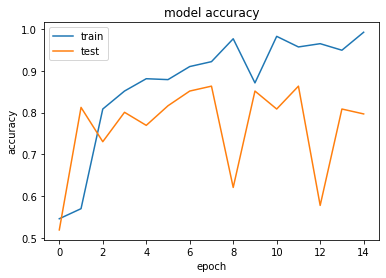

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We see that out CNN model is not training well and by inspecting the graph we infer that triaining and validation loss is not a smooth function of number of epoch and increases and decreases randomly.<br>
We now turn towards transfer learning where we use pretrained CNN model and build our classifier on top of that.<br>
Pretrained model contains weights which already tuned to solve the similar model and the model is previously trained on much larger dataset

Creating the base model from the MobileNet V2 model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like jackfruit and syringe. This base of knowledge will help us classify horses and humans from our specific dataset.

In [14]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
#imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False
#setting the entire model's trainable flag to False will freeze all the layers
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [0]:
base_learning_rate = 0.0001
#Since there are two classes w are using binary cross entropy as our loss function and from_logit = True since we want a linear output
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=(num_train)//BATCH_SIZE,
                   epochs=10,
                    verbose = 1,
                  validation_data = validation_generator,
                  validation_steps=(num_val)//BATCH_SIZE,)

Epoch 1/10
32/32 [==============================] - 170s 5s/step - loss: 0.6409 - accuracy: 0.5839 - val_loss: 0.6428 - val_accuracy: 0.7109
Epoch 2/10
32/32 [==============================] - 165s 5s/step - loss: 0.5335 - accuracy: 0.6925 - val_loss: 0.5209 - val_accuracy: 0.8125
Epoch 3/10
32/32 [==============================] - 168s 5s/step - loss: 0.4611 - accuracy: 0.7869 - val_loss: 0.4629 - val_accuracy: 0.8672
Epoch 4/10
32/32 [==============================] - 168s 5s/step - loss: 0.3945 - accuracy: 0.8523 - val_loss: 0.4025 - val_accuracy: 0.9062
Epoch 5/10
32/32 [==============================] - 161s 5s/step - loss: 0.3461 - accuracy: 0.8894 - val_loss: 0.3495 - val_accuracy: 0.9414
Epoch 6/10
32/32 [==============================] - 172s 5s/step - loss: 0.2787 - accuracy: 0.9266 - val_loss: 0.2763 - val_accuracy: 0.9688
Epoch 7/10
32/32 [==============================] - 172s 5s/step - loss: 0.2504 - accuracy: 0.9266 - val_loss: 0.2454 - val_accuracy: 0.9688
Epoch 8/10
32

In [21]:
 history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

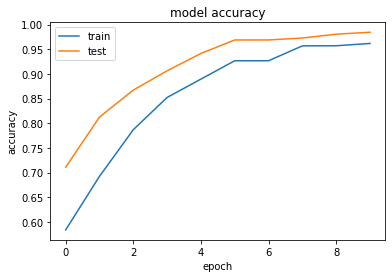

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We see that the graph is still increasing and hasn't yet converged, we train for more epochs

In [34]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#Reloading and compiling the model since the weights have been changed
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
#imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False
#setting the entire model's trainable flag to False will freeze all the layers
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

callbacks = myCallback()

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=(num_train)//BATCH_SIZE,
                   epochs=30,
                    verbose = 1,
                  validation_data = validation_generator,
                  validation_steps=(num_val)//BATCH_SIZE,
                  callbacks = [callbacks])

Epoch 1/30
32/32 [==============================] - 162s 5s/step - loss: 0.6567 - accuracy: 0.5749 - val_loss: 0.5979 - val_accuracy: 0.5703
Epoch 2/30
32/32 [==============================] - 170s 5s/step - loss: 0.5437 - accuracy: 0.6945 - val_loss: 0.4835 - val_accuracy: 0.6992
Epoch 3/30
32/32 [==============================] - 167s 5s/step - loss: 0.4466 - accuracy: 0.7990 - val_loss: 0.3961 - val_accuracy: 0.8594
Epoch 4/30
32/32 [==============================] - 163s 5s/step - loss: 0.3623 - accuracy: 0.8734 - val_loss: 0.3250 - val_accuracy: 0.9297
Epoch 5/30
32/32 [==============================] - 170s 5s/step - loss: 0.3136 - accuracy: 0.9045 - val_loss: 0.2693 - val_accuracy: 0.9609
Epoch 6/30
32/32 [==============================] - 171s 5s/step - loss: 0.2660 - accuracy: 0.9424 - val_loss: 0.2241 - val_accuracy: 0.9727
Epoch 7/30
32/32 [==============================] - 162s 5s/step - loss: 0.2316 - accuracy: 0.9487 - val_loss: 0.1888 - val_accuracy: 0.9883
Epoch 8/30
32

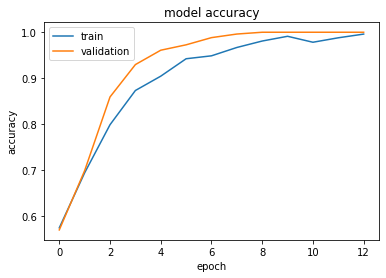

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We have achieved state-of-the-art 99.6% accuracy on trianing set and 100% accuracy on validation set by using transfer learning.